In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import plotly.graph_objects as go

import plotly.offline as py
from plotly.offline import plot, iplot

In [2]:
# escolher a ação desejada
acao = 'PETR4.SA'
 
# importar dados para o DataFrame
df = web.DataReader(acao, data_source='yahoo', start='27-02-2000')
 
# ver as 5 primeiras entradas
display(df.head())
display(df.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-02-28,5.750,5.750,5.750,5.750,1.159680e+10,3.731675
2000-02-29,5.775,5.775,5.775,5.775,2.432256e+10,3.747898
2000-03-01,5.875,5.875,5.875,5.875,2.382848e+10,3.812799
2000-03-02,5.838,5.838,5.838,5.838,2.405376e+10,3.788786
2000-03-03,6.038,6.038,6.038,6.038,1.321728e+10,3.918584


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-22,29.270000,28.670000,29.000000,29.100000,41602700.0,29.100000
2021-06-23,29.520000,29.000000,29.250000,29.299999,57278500.0,29.299999
2021-06-24,29.650000,29.219999,29.490000,29.650000,51447000.0,29.650000
2021-06-25,29.790001,28.950001,29.690001,29.100000,84491400.0,29.100000
2021-06-28,29.270000,28.670000,29.180000,29.049999,40163600.0,29.049999


In [3]:
import plotly.graph_objs as go
data = [go.Scatter(
x=df.index,
y=df['Close'])]

layout = dict(
    autosize=False,
    width=1500,
    height=900,
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [4]:
# Média simples de 9 dias
df['MM_9'] = df.Close.rolling(window=9).mean()

# Média simples de 17 dias
df['MM_17'] = df.Close.rolling(window=17).mean()

In [5]:
close = go.Scatter(
    x=df.index,
    y=df.Close,
    name = "PETR4 Close",
    line = dict(color = '#330000'),
    opacity = 0.8
)

MM_9 = go.Scatter(
    x=df.index,
    y=df['MM_9'],
    name = "Média Móvel 9 Períodos",
    line = dict(color = '#B2FF66'),
    opacity = 0.8
)

MM_17 = go.Scatter(
    x=df.index,
    y=df['MM_17'],
    name = "Média Móvel 17 Períodos",
    line = dict(color = '#FF00FF'),
    opacity = 0.8
)

data = [close, MM_9, MM_17]

layout = dict(
    autosize=False,
    width=1500,
    height=900,
    xaxis = dict(
        range = ['2020-01-01','2020-12-31']
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [6]:
Close = go.Scatter(
x=df.index,
y=df.Close,
name = "PETR4 High",
line = dict(color = '#17BECF'),
opacity = 0.8)

data = [Close]

layout = dict(
    autosize=False,
    width=1500,
    height=900,
    title="Série com Rangeslider e Botoes",
    title_x=0.5,
    xaxis=dict(
        rangeselector=dict(
        buttons=list([
                dict(count=1,
                    label='1m',
                    step='month',
                    stepmode='backward'),
                dict(count=6,
                    label='6m',
                    step='month',
                    stepmode='backward'),
                dict(step='all')
                ])
    ),
    rangeslider=dict(
        visible = True
    ),
    type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [7]:
def plot_acao(acao: str, start_date: str = None):
    if start_date == None:
        start_date = '01-01-2000'    
    # importar dados para o DataFrame
    df = web.DataReader(f'{acao}.SA', data_source='yahoo', start=start_date)
    
    trace1 = {
    'x': df.index,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': acao,
    'showlegend': False
    }
    
    data = [trace1]
    layout = go.Layout()
    
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(
    autosize=False,
    width=1500,
    height=900
    )
    
    return display(df.tail(10)), fig.show()

In [8]:
plot_acao('WEGE3', '25-09-2010')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-15,35.730000,34.580002,34.930000,35.459999,9640400.0,35.438244
2021-06-16,35.610001,34.599998,35.610001,34.830002,13348900.0,34.808632
2021-06-17,34.900002,34.180000,34.880001,34.419998,5679500.0,34.398880
2021-06-18,35.189999,34.290001,34.360001,35.189999,7764800.0,35.168407
2021-06-21,35.900002,34.950001,35.139999,35.250000,7294200.0,35.228374
2021-06-22,35.049999,34.180000,35.049999,34.290001,8705700.0,34.268963
2021-06-23,34.709999,33.799999,34.660000,33.950001,6677900.0,33.929173
2021-06-24,34.400002,33.889999,34.209999,34.330002,9120300.0,34.308941
2021-06-25,34.619999,33.299999,34.099998,33.459999,5393700.0,33.439472


(None, None)

In [9]:
trace = go.Candlestick(x=df.index,
open=df['Open'],
high=df['High'],
low=df['Low'],
close=df['Close'])
data = [trace]

layout = {
'autosize': False,
'width': 1500,
'height': 900,
'title': 'PETR4 Preços no Periodo',
'title_x': 0.5,
'yaxis': {'title': 'PETR4 Preço'},
'annotations': [{
'x': '2017-05-17', 
'y': 15, 
'xref': 'x', 
'yref': 'y',
'showarrow': True,
'font':dict(
family="Courier New, monospace",
size=12
),
'text': 'Audio Joesley',
'align':"center",
'arrowhead':2,
'arrowsize':1,
'arrowwidth':2,
'bordercolor':"#c7c7c7",
'borderwidth':2,
'borderpad':4
},
{
'x': '2016-01-01', 
'y': 7, 
'xref': 'x', 
'yref': 'y',
'showarrow': True,
'font':dict(
family="Courier New, monospace",
size=12
),
'text': 'Impeachment Dilma',
'align':"center",
'arrowhead':2,
'arrowsize':1,
'arrowwidth':2,
'bordercolor':"#c7c7c7",
'borderwidth':2,
'borderpad':4
},
{
'x': '2018-05-27', 
'y': 27, 
'xref': 'x', 
'yref': 'y',
'showarrow': True,
'font':dict(
family="Courier New, monospace",
size=12
),
'text': 'Greve dos Caminhoneiros',
'align':"center",
'arrowhead':2,
'arrowsize':1,
'arrowwidth':2,
'bordercolor':"#c7c7c7",
'borderwidth':2,
'borderpad':4
}]
}

fig = dict(data=data, layout=layout)
py.iplot(fig)

# Fit and Predict

In [10]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,MM_9,MM_17
Date,,,,,,,,
2021-06-22,29.270000,28.670000,29.000000,29.100000,41602700.0,29.100000,28.741111,28.341177
2021-06-23,29.520000,29.000000,29.250000,29.299999,57278500.0,29.299999,28.810000,28.477059
2021-06-24,29.650000,29.219999,29.490000,29.650000,51447000.0,29.650000,28.930000,28.640588
2021-06-25,29.790001,28.950001,29.690001,29.100000,84491400.0,29.100000,28.968889,28.747059
2021-06-28,29.270000,28.670000,29.180000,29.049999,40163600.0,29.049999,28.971111,28.816471


In [11]:
df.reset_index(inplace=True)
df

,Date,High,Low,Open,Close,Volume,Adj Close,MM_9,MM_17
0,2000-02-28,5.750000,5.750000,5.750000,5.750000,1.159680e+10,3.731675,NaN,NaN
1,2000-02-29,5.775000,5.775000,5.775000,5.775000,2.432256e+10,3.747898,NaN,NaN
2,2000-03-01,5.875000,5.875000,5.875000,5.875000,2.382848e+10,3.812799,NaN,NaN
3,2000-03-02,5.838000,5.838000,5.838000,5.838000,2.405376e+10,3.788786,NaN,NaN
4,2000-03-03,6.038000,6.038000,6.038000,6.038000,1.321728e+10,3.918584,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5352,2021-06-22,29.270000,28.670000,29.000000,29.100000,4.160270e+07,29.100000,28.741111,28.341177
5353,2021-06-23,29.520000,29.000000,29.250000,29.299999,5.727850e+07,29.299999,28.810000,28.477059
5354,2021-06-24,29.650000,29.219999,29.490000,29.650000,5.144700e+07,29.650000,28.930000,28.640588
5355,2021-06-25,29.790001,28.950001,29.690001,29.100000,8.449140e+07,29.100000,28.968889,28.747059


In [12]:
# Drop missing value
df.dropna(inplace=True)

In [13]:
X = df.drop(columns=['Date','Close'])
y = df.drop(columns=['High','Low','Open','Volume','Adj Close','MM_9','MM_17'])

In [14]:
X

,High,Low,Open,Volume,Adj Close,MM_9,MM_17
16,5.800000,5.800000,5.800000,2.549248e+10,3.764126,5.978000,5.960882
17,5.814000,5.814000,5.814000,2.511360e+10,3.773209,5.913000,5.964647
18,5.813000,5.813000,5.813000,2.644736e+10,3.772562,5.868556,5.966882
19,5.813000,5.813000,5.813000,1.524992e+10,3.772562,5.824111,5.963235
20,6.250000,6.250000,6.250000,2.272768e+10,4.056168,5.872667,5.987471
...,...,...,...,...,...,...,...
5352,29.270000,28.670000,29.000000,4.160270e+07,29.100000,28.741111,28.341177
5353,29.520000,29.000000,29.250000,5.727850e+07,29.299999,28.810000,28.477059
5354,29.650000,29.219999,29.490000,5.144700e+07,29.650000,28.930000,28.640588
5355,29.790001,28.950001,29.690001,8.449140e+07,29.100000,28.968889,28.747059


In [15]:
y

,Date,Close
16,2000-03-21,5.800000
17,2000-03-22,5.814000
18,2000-03-23,5.813000
19,2000-03-24,5.813000
20,2000-03-27,6.250000
...,...,...
5352,2021-06-22,29.100000
5353,2021-06-23,29.299999
5354,2021-06-24,29.650000
5355,2021-06-25,29.100000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

#Separando os dados em treino e teste

SEED = 1010
np.random.seed(SEED)   #Evitando um a randomizacao para cada novo

train_X, test_X, train_y, test_y = train_test_split(X, y.Close, test_size = 0.25)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(train_X), len(test_X)))

Treinaremos com 4005 elementos e testaremos com 1336 elementos


In [17]:
accuracy_list = []
roc_list = []

In [18]:
test_X.sort_index()

,High,Low,Open,Volume,Adj Close,MM_9,MM_17
25,5.850000,5.850000,5.850000,1.808384e+10,3.796573,5.912889,5.918765
28,6.150000,6.150000,6.150000,2.497536e+10,3.991271,5.978667,5.906588
31,5.900000,5.900000,5.900000,2.187520e+10,3.829022,5.971667,5.933765
37,5.088000,5.088000,5.088000,3.879936e+10,3.302046,5.747333,5.840235
39,5.100000,5.100000,5.100000,0.000000e+00,3.309834,5.520889,5.737235
...,...,...,...,...,...,...,...
5347,29.059999,28.629999,28.959999,4.259710e+07,29.030001,28.556667,27.549412
5349,29.200001,27.910000,29.010000,9.526460e+07,28.129999,28.656667,27.839412
5351,29.000000,28.400000,28.400000,5.070960e+07,28.950001,28.692222,28.153530
5353,29.520000,29.000000,29.250000,5.727850e+07,29.299999,28.810000,28.477059


In [19]:
test_y

2417    31.889999
1579    21.645000
2335    29.980000
363      6.356250
4514    18.240000
          ...    
2200    35.430000
5356    29.049999
2967    21.580000
1626    20.275000
1081    10.150000
Name: Close, Length: 1336, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

#Treinando o modelo e fazendo uma previsao com LinearRegression
clf = LinearRegression()
clf.fit(train_X, np.ravel(train_y))
predict_lr = clf.predict(test_X)

print(f'A previsao de Linear Regression apresentou:\nInterceptor = {(clf.intercept_).round(7)} e Coeficientes = {clf.coef_}')

df_predict = pd.DataFrame(test_y.values, columns=['data_test'])
df_predict['predict_lr'] = predict_lr
df_predict['residue'] = df_predict.data_test - df_predict.predict_lr
df_predict

A previsao de Linear Regression apresentou:
Interceptor = -0.0006168 e Coeficientes = [ 8.23076627e-01  7.87132548e-01 -6.31607168e-01  2.05169215e-13
  4.09485613e-03  3.21965541e-02 -1.45734982e-02]


,data_test,predict_lr,residue
0,31.889999,31.792005,0.097994
1,21.645000,21.668937,-0.023937
2,29.980000,29.688691,0.291309
3,6.356250,6.347792,0.008458
4,18.240000,18.130769,0.109230
...,...,...,...
1331,35.430000,34.956959,0.473042
1332,29.049999,28.859406,0.190593
1333,21.580000,21.369822,0.210178
1334,20.275000,19.617623,0.657377


In [21]:
import matplotlib.pyplot as plt

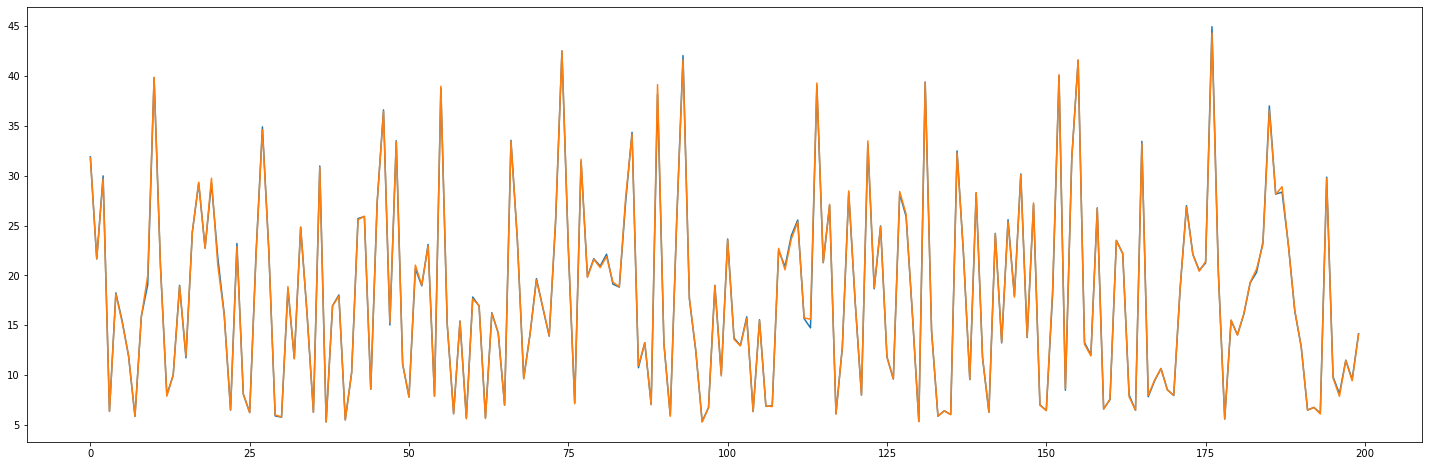

In [22]:
plt.figure(figsize=(25,8))
# plt.plot(y.Close)
df_slice = df_predict[:200]
plt.plot(df_slice[['data_test', 'predict_lr']])